In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [2]:
# reading in the datasets 
train = pd.read_csv('credit_train.csv')
test = pd.read_csv('credit_test.csv')

In [3]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Data Cleaning

In [4]:
# checking null values 
train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [5]:
# assigning our target variable numeric values
train['Loan Status'] = np.where(train['Loan Status']=='Fully Paid', 0, 1)

In [6]:
# cleaning columns with nulls 
train['Months since last delinquent'] = np.where((train['Months since last delinquent'].isna() == True),0,train['Months since last delinquent'])
train['Term'] = np.where(train['Term']=='Fully Paid', 0, 1)
train['Annual Income'] = np.where((train['Annual Income'].isna() == True),0,train['Annual Income'])
train['Credit Score'] = np.where((train['Credit Score'].isna() == True),0,train['Credit Score'])

In [7]:
# filling nulls in years in current job column
train['ych_range'] = pd.qcut(train['Years of Credit History'],5, labels=['one','two','three','four','five'])

train['Years in current job'] = np.where(train['Years in current job'].isna()==True, train['ych_range'], train['Years in current job'])

# input_ = {'10+ years':10, '2 years':2, '3 years':3, '< 1 year':0, '5 years':5, '1 year':1, '4 years':4,
#           '6 years':6, '7 years':7, '8 years':8, '9 years':9, 'one':4, 'two':5, 'three':6, 'four':6, 'five':7}

input_ = {'10+ years':'10+ years', '2 years':'2 years', '3 years':'3 years', '< 1 year':'< 1 year', 
          '5 years':'5 years', '1 year':'1 year', '4 years':'4 years', '6 years':'6 years', '7 years':'7 years',
          '8 years':'8 years', '9 years':'9 years',
          'one':'4 years', 'two':'5 years', 'three':'6 years', 'four':'6 years', 'five':'7 years'}

train['Years in current job'] = train['Years in current job'].map(input_)

In [8]:
train.isna().sum()

Loan ID                         514
Customer ID                     514
Loan Status                       0
Current Loan Amount             514
Term                              0
Credit Score                      0
Annual Income                     0
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent      0
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             516
Bankruptcies                    718
Tax Liens                       524
ych_range                       514
dtype: int64

In [9]:
# subclass of people  had an abnormally high credit score (>850) and 100% default rate
# we decided to divide these values by 10 since this issue was skewing our data

In [10]:
# dividing credit score values by 10 if they are > 850 
train['Credit Score'] = np.where(train['Credit Score']>850, train['Credit Score']/10, train['Credit Score'])

In [11]:
# creating a new dataframe with our nulls dropped
df = train.dropna()

In [12]:
df.shape

(99794, 20)

In [13]:
df.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
ych_range                       0
dtype: int64

## EDA

#### percentage of defaulters

In [14]:
df['Loan Status'].value_counts()

0    77207
1    22587
Name: Loan Status, dtype: int64

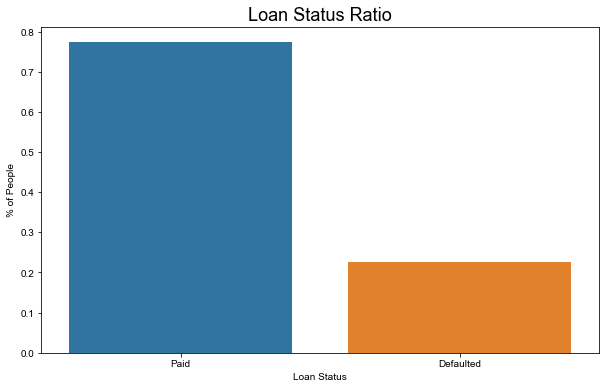

In [15]:
plt.figure(figsize = (10,6))
y = [(77207/len(df)),(22587/len(df))]
x_labels = ['Paid','Defaulted']
sns.barplot(x_labels,y)
sns.set(style='dark')
plt.xlabel('Loan Status');
plt.ylabel('% of People')
plt.title('Loan Status Ratio', fontsize=18);

#### income categories

In [16]:
df2 = df

In [17]:
df2.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,99794.000000,9.979400e+04,99794.0,99794.000000,9.979400e+04,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,9.979400e+04,9.979400e+04,99794.000000,99794.000000
mean,0.226336,1.175728e+07,1.0,579.108083,1.114381e+06,18486.117117,18.193694,16.357276,11.130910,0.168577,2.946602e+05,7.575265e+05,0.117743,0.029371
std,0.418461,3.177985e+07,0.0,282.993021,1.113000e+06,12172.465813,7.015261,23.023429,5.007745,0.483087,3.760668e+05,8.349533e+06,0.351427,0.258433
min,0.000000,1.542200e+04,1.0,0.000000,0.000000e+00,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,1.796960e+05,1.0,669.000000,5.746218e+05,10228.317500,13.500000,0.000000,8.000000,0.000000,1.127698e+05,2.735260e+05,0.000000,0.000000
50%,0.000000,3.124770e+05,1.0,715.000000,1.018761e+06,16237.210000,16.900000,0.000000,10.000000,0.000000,2.099120e+05,4.678740e+05,0.000000,0.000000
75%,0.000000,5.250960e+05,1.0,735.000000,1.512884e+06,24025.215000,21.700000,29.000000,14.000000,0.000000,3.680680e+05,7.828260e+05,0.000000,0.000000
max,1.000000,1.000000e+08,1.0,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [18]:
df2['Income_Category'] = pd.qcut(df2['Annual Income'],5, labels=['One','Two','Three','Four','Five'])

In [19]:
df2['Income_Category'].value_counts()

Two      19962
One      19959
Five     19958
Four     19958
Three    19957
Name: Income_Category, dtype: int64

In [20]:
df2.groupby(['Income_Category'])['Loan Status'].mean()

Income_Category
One      0.282930
Two      0.257890
Three    0.227389
Four     0.196362
Five     0.167101
Name: Loan Status, dtype: float64

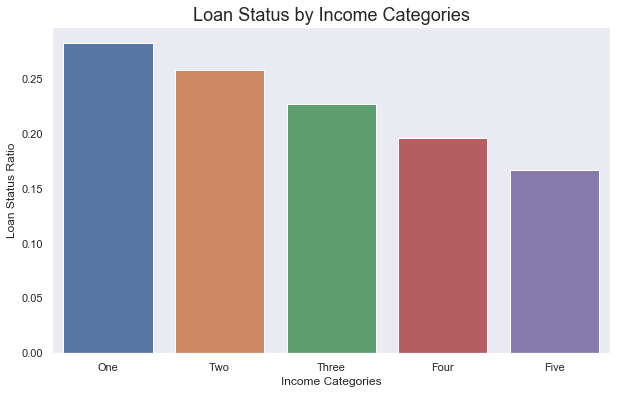

In [21]:
y = df2.groupby(['Income_Category'])['Loan Status'].mean()
plt.figure(figsize = (10,6))
sns.barplot(y.index,y)
sns.set(style='dark')
plt.xlabel('Income Categories');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Income Categories', fontsize=18);

In [22]:
# H0: there is no significant difference in loan status between income categories 
# H1: there is a significant difference in loan status between income categories 

In [23]:
income1 = df2[df2['Income_Category']=='One']
income2 = df2[df2['Income_Category']=='Two']
income3 = df2[df2['Income_Category']=='Three']
income4 = df2[df2['Income_Category']=='Four'] 
income5 = df2[df2['Income_Category']=='Five']

df_freq2=pd.DataFrame(columns=['one', 'two', 'three', 'four','five'])
df_freq2['one']= income1.groupby('Loan Status')['Loan Status'].count()
df_freq2['two']= income2.groupby('Loan Status')['Loan Status'].count()
df_freq2['three']= income3.groupby('Loan Status')['Loan Status'].count()
df_freq2['four']= income4.groupby('Loan Status')['Loan Status'].count()
df_freq2['five']= income5.groupby('Loan Status')['Loan Status'].count()

In [24]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq2
print(table)
stat, p, dof, expected = chi2_contingency(df_freq2)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

               one    two  three   four   five
Loan Status                                   
0            14312  14814  15419  16039  16623
1             5647   5148   4538   3919   3335
dof=4
[[15441.55473275 15443.87572399 15440.00740525 15440.781069
  15440.781069  ]
 [ 4517.44526725  4518.12427601  4516.99259475  4517.218931
   4517.218931  ]]
probability=0.950, critical=9.488, stat=981.010)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


We reject the null, there is a significant difference in loan status between income categories.

#### home ownership

In [25]:
df2 = df

In [26]:
# converting home ownership to numerical value 
df2['Home Ownership'] = np.where(df2['Home Ownership']=='Rent', 1, df2['Home Ownership'])
df2['Home Ownership'] = np.where(df2['Home Ownership']=='Home Mortgage', 2, df2['Home Ownership'])
df2['Home Ownership'] = np.where(df2['Home Ownership']=='Own Home', 3, df2['Home Ownership'])
df2['Home Ownership'] = np.where(df2['Home Ownership']=='HaveMortgage', 4, df2['Home Ownership'])

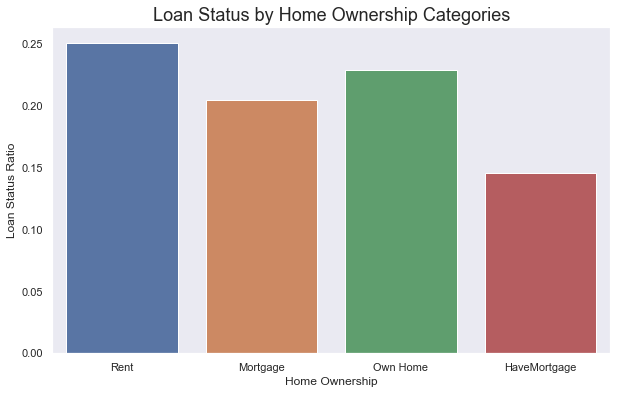

In [27]:
plt.figure(figsize = (10,6))
y = df2.groupby(['Home Ownership'])['Loan Status'].mean()
labels = ['Rent','Mortgage','Own Home','HaveMortgage']
sns.barplot(labels,y)
sns.set(style='dark')
plt.xlabel('Home Ownership');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Home Ownership Categories', fontsize=18);

#### purpose of loan 

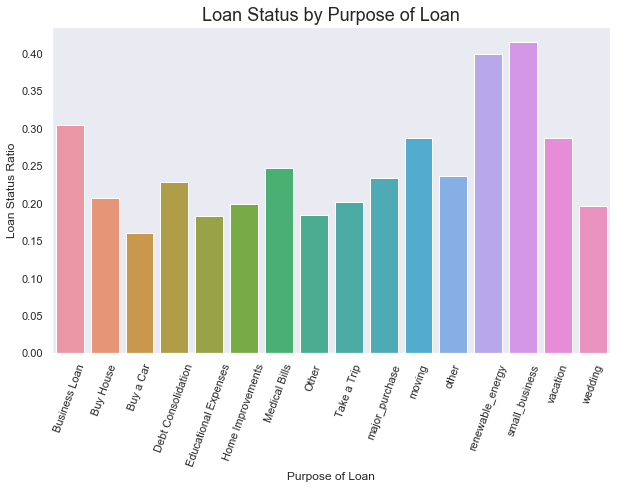

In [28]:
y = df2.groupby(['Purpose'])['Loan Status'].mean()
plt.figure(figsize = (10,6))
sns.barplot(y.index,y)
sns.set(style='dark')
plt.xlabel('Purpose of Loan')
degrees = 70
plt.xticks(rotation=degrees)
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Purpose of Loan', fontsize=18);

#### credit problems

In [29]:
df2['Number of Credit Problems'] = np.where(df2['Number of Credit Problems']>=3.0,3.0,df2['Number of Credit Problems'])

In [30]:
df2.groupby(['Number of Credit Problems'])['Loan Status'].mean()

Number of Credit Problems
0.0    0.226383
1.0    0.223797
2.0    0.237875
3.0    0.246180
Name: Loan Status, dtype: float64

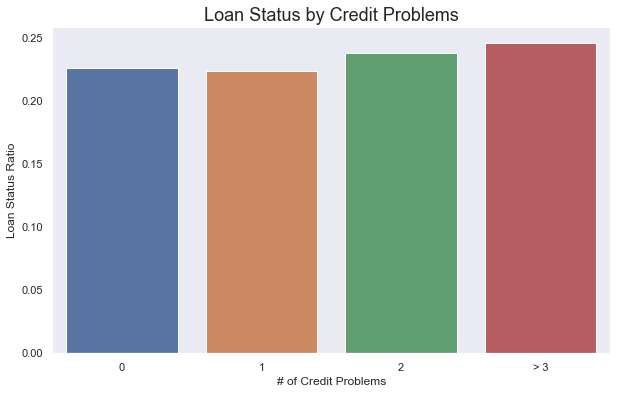

In [31]:
y = df2.groupby(['Number of Credit Problems'])['Loan Status'].mean()
labels = ['0','1','2','> 3']
plt.figure(figsize = (10,6))
sns.barplot(labels,y)
sns.set(style='dark')
plt.xlabel('# of Credit Problems');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Credit Problems', fontsize=18);

In [32]:
# H0: there is no significant difference in loan status between credit problem categories
# H1: there is a significant different in loan status between credit problem categories

In [33]:
df2['Number of Credit Problems'] = df2['Number of Credit Problems'].astype(int)

In [34]:
credit0 = df2[df2['Number of Credit Problems']==0]
credit1 = df2[df2['Number of Credit Problems']==1]
credit2 = df2[df2['Number of Credit Problems']==2]
credit3 = df2[df2['Number of Credit Problems']==3] 

df_freq3=pd.DataFrame(columns=['zero', 'one', 'two', 'three'])
df_freq3['zero']= credit0.groupby('Loan Status')['Loan Status'].count()
df_freq3['one']= credit1.groupby('Loan Status')['Loan Status'].count()
df_freq3['two']= credit2.groupby('Loan Status')['Loan Status'].count()
df_freq3['three']= credit3.groupby('Loan Status')['Loan Status'].count()

In [35]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq3
print(table)
stat, p, dof, expected = chi2_contingency(df_freq3)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

              zero   one  two  three
Loan Status                         
0            66405  9368  990    444
1            19432  2701  309    145
dof=3
[[66408.97507866  9337.3477664   1004.98920777   455.68794717]
 [19428.02492134  2731.6522336    294.01079223   133.31205283]]
probability=0.950, critical=7.815, stat=2.758)
Independent (fail to reject H0)
signigicance=0.050, p=0.430,
Independent (fail to reject)


We fail to reject the null, there is no significant difference in loan status between credit problem categories. 

#### income and credit score

In [36]:
y = df2[df2['Annual Income'] <= 150000000]

In [37]:
x = y[(y[['Credit Score']]!= 0).all(axis=1)]

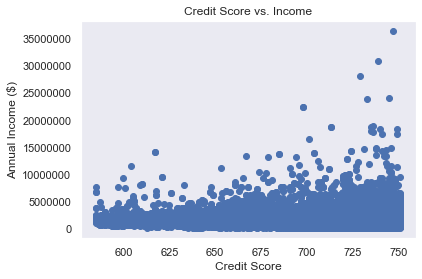

In [38]:
import matplotlib.pyplot as plt
import numpy as np
# Some example data to display
fig, ax = plt.subplots()
ax.scatter(x['Credit Score'], x['Annual Income'])
ax.set_title('Credit Score vs. Income')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Annual Income ($)')
# set tick style
ax.ticklabel_format(axis='y', style='plain')


#### credit score and loan status

In [39]:
df2['Credit Score'] = df2['Credit Score'].astype(int)

In [40]:
df2['Credit_Category'] = np.where(df2['Credit Score']<=575,1,2)

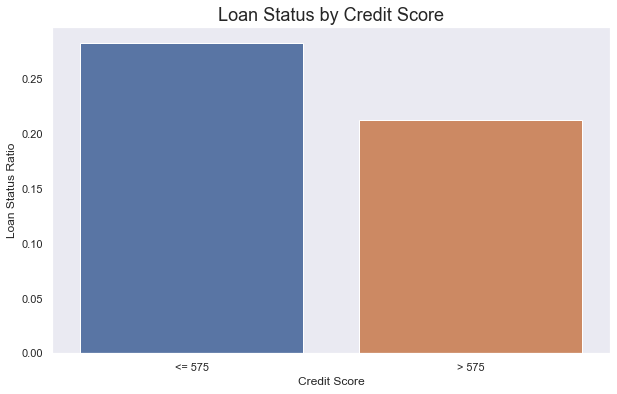

In [41]:
y = df2.groupby(['Credit_Category'])['Loan Status'].mean()
labels = ['<= 575','> 575']
plt.figure(figsize = (10,6))
sns.barplot(labels,y)
sns.set(style='dark')
plt.xlabel('Credit Score');
plt.ylabel('Loan Status Ratio')
plt.title('Loan Status by Credit Score', fontsize=18);

In [42]:
# H0: there is no significant difference in loan status between low and high credit score categories 
# H1: there is a significant difference in loan status between low and high credit score categories 

In [43]:
credit1 = df2[df2['Credit Score']<=575]
credit2 = df2[df2['Credit Score']>575]

df_freq4=pd.DataFrame(columns=['one', 'two'])
df_freq4['one']= credit1.groupby('Loan Status')['Loan Status'].count()
df_freq4['two']= credit2.groupby('Loan Status')['Loan Status'].count()

In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq4
print(table)
stat, p, dof, expected = chi2_contingency(df_freq4)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

               one    two
Loan Status              
0            13695  63512
1             5416  17171
dof=1
[[14785.48787502 62421.51212498]
 [ 4325.51212498 18261.48787502]]
probability=0.950, critical=3.841, stat=439.113)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


We reject the null, there is a significant difference in loan status between low and high credit score categories. 